# Enfermedades del Corazón: ¿Cuáles son los Indicadores?

Presentado por: Juan Carlos Martinez F.

## Base de datos

El conjunto de datos viene de investigaciones sobre enfermedades cardiovasculares realizdas en clevelan de Cleveland el conjunto de datos tiene 303 entradas y 12 descriptores 

In [2]:
# Bibliotecas utilizadas

import pandas as pd  # Biblioteca para trabajar con datos tabulares
import numpy as np   # Trabajar con matrices y vectores
import time          # Para medir tiempo

# Bibliotecas para generar gráficos
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split   # Separación de dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler        # Escalonador

# Algoritmos de Regresión
from sklearn.linear_model import LinearRegression   # Regresión Lineal
from sklearn.linear_model import Ridge, RidgeCV     # Regresión Rige
from sklearn.linear_model import Lasso, LassoCV     # Regresión Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint



# Validación cruzada
from sklearn.model_selection import KFold            # Para separar los datos en k folds
from sklearn.model_selection import cross_validate   # Para correr el entrenamiento y test sobre kfolds
from sklearn import preprocessing          # Ayuda en la transformación de los datos
from sklearn.pipeline import make_pipeline # Permite realizar uma secuencia de procesos
from sklearn.metrics import get_scorer_names

# Métricas de desempeño
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score       # Métricas de Regresión
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.metrics import confusion_matrix, confusion_matrix, classification_report, ConfusionMatrixDisplay


# Algotirmos de Clasificación
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import shap
from yellowbrick.regressor import PredictionError

# Funciones

## Desempeño

In [3]:

def score_summary_test(names, classifierss):
    
    cols = ["Clasificador", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)
    
    for name, clf in zip(names, classifierss):
        clf.fit(x_train_scaled, y_train)
        pred = clf.predict(x_test_scaled)
        accuracy = accuracy_score(y_test, pred)
        pred_proba = clf.predict_proba(x_test_scaled)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Confusion matrix, cm
        cm = confusion_matrix(y_test, pred) 
        
        # Recall: TP/(TP+FN)
        recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
        
        # Precision: TP/(TP+FP)
        precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
        
        # F1 score: 2*recall*precision/(recall + precision)
        f1 = 2 * recall * precision / (recall + precision)
        
        df = pd.DataFrame([[name, accuracy * 100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = pd.concat([data_table, df], ignore_index=True)
    
    return np.round(data_table, 2)


# Para La validación
def score_summary_val(names, classifierss):
    
    cols = ["Clasificador", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)
    
    for name, clf in zip(names, classifierss):
        clf.fit(x_train_scaled, y_train)
        pred = clf.predict(x_val_scaled)
        accuracy = accuracy_score(y_val, pred)
        pred_proba = clf.predict_proba(x_val_scaled)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Confusion matrix, cm
        cm = confusion_matrix(y_val, pred) 
        
        # Recall: TP/(TP+FN)
        recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
        
        # Precision: TP/(TP+FP)
        precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
        
        # F1 score: 2*recall*precision/(recall + precision)
        f1 = 2 * recall * precision / (recall + precision)
        
        df = pd.DataFrame([[name, accuracy * 100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = pd.concat([data_table, df], ignore_index=True)
    
    return np.round(data_table, 2)


## Curvas Roc

In [4]:

def roc_auc_curve_test(names, classifierss):
           
    plt.figure(figsize=(12, 8))   
        
    for name, clf in zip(names, classifierss):
        
        # Para 
        clf.fit(x_train_scaled, y_train)
        
        pred_proba = clf.predict_proba(x_test_scaled)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_test,pred_proba )
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('Falso Positivo')
        plt.ylabel('Verdadero Positivo')
        plt.title('Curva ROC Para Datos de Testeo', fontsize=20)
        plt.legend(loc="lower right")
        
        
def roc_auc_curve_val(names, classifierss):
    
    plt.figure(figsize=(12, 8))   
        
    for name, clf in zip(names, classifierss):
        
        # Para 
        clf.fit(x_train_scaled, y_train)
        
        pred_proba = clf.predict_proba(x_val_scaled)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val,pred_proba )
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('Falso Positivo')
        plt.ylabel('Verdadero Positivo')
        plt.title('Curva ROC Para Datos de Validación', fontsize=20)
        plt.legend(loc="lower right")
  

## Matrices de Confusión

In [24]:
'''
    Argumentos:
    names: lista de nombres del clasificador
    classifiers: lista de algoritmos de clasificación (en tuplas)
    nrows, ncols: número de filas y columnas en los subplots
    fig_a, fig_b: dimensiones del tamaño de la figura
    '''

def plot_conf_matrix_test(x_train, y_train, x_test,y_test,names, classifiers, nrows, ncols, fig_a, fig_b):
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    fig.suptitle('Matrices de Confusión para el Test', fontsize=25)
    
    for name, clf, ax in zip(names, classifiers, axes.flatten()):
        
        clf.fit(x_train, y_train)
        predic = clf.predict(x_test)
        confusion_mat = confusion_matrix(y_true=y_test, y_pred=predic, labels=[1, 0])
        disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['1', '0'])
        disp.plot(values_format='d', ax=ax)
        ax.grid(False)
        ax.title.set_text(name)
        
    plt.tight_layout()
    plt.show()
    

# Para la Validación
def plot_conf_matrix_val(names, classifiers, nrows, ncols, fig_a, fig_b):
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    fig.suptitle('Matrices de Confusión para el Test', fontsize=25)
    
    for name, clf, ax in zip(names, classifiers, axes.flatten()):
        
        clf.fit(x_train_scaled, y_train)
        predic = clf.predict(x_test_scaled)
        confusion_mat = confusion_matrix(y_true=y_test, y_pred=predic, labels=[1, 0])
        disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['1', '0'])
        disp.plot(values_format='d', ax=ax)
        ax.grid(False)
        ax.title.set_text(name)
        
    plt.tight_layout()
    plt.show()



## Carga, Lectura de Base de Datos

In [6]:
file = pd.read_csv('train.csv')
df = pd.DataFrame(file)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Diccionario
* age: age in years
* sex: sex
    -  1 = male
    -  0 = female
* cp: chest pain type (tipo de dolor en el pecho)
  - Value 0: typical angina (Tipico)
  - Value 1: atypical angina (Atipico)
  - Value 2: non-anginal pain (No hay dolor)
  - Value 3: asymptomatic (Asintomatico)
* trestbps: resting blood pressure (in mm Hg on admission to the hospital) (Preson Arterial en reposo)
* chol: serum cholestoral in mg/dl (Colesterol sérico)
* fbs: (fasting blood sugar > 120 mg/dl) (Azucar en sangre en ayunas mayor a 120 miligramos por decilitro)
    -  1 = true;
    -  0 = false
* restecg: resting electrocardiographic results (Resultado de electrocardiograma en reposo)
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) (presenta anomalías de la onda ST-T (inversión de la onda T y/o elevación o depresión del ST de > 0,05 mV))
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria (muestra hipertrofia ventricular izquierda probable o definida según los criterios de Estres.)
* thalach: maximum heart rate achieved (frecuencia cardiaca máxima alcanzada)
* exang: exercise induced angina (angina inducida por el ejercicio)
    -  1 = yes
    -  0 = no
* oldpeak = ST depression induced by exercise relative to rest (Depresión del ST inducida por el ejercicio en relación con el reposo)
* slope: the slope of the peak exercise ST segment (la pendiente del pico del segmento ST de ejercicio)
  - Value 0: upsloping (pendiente ascendente)
  - Value 1: flat (Plano)
  - Value 2: downsloping (Pediente Descendente)
* ca: number of major vessels (0-3) colored by flourosopy (número de vasos mayores (0-3) coloreados por flouroscopia)
* thal:
    -  0 = error (in the original dataset 0 maps to NaN's) (error (en el conjunto de datos original, 0 corresponde a NaN))
    -  1 = fixed defect (defecto corregido)
    -  2 = normal
    -  3 = reversable defect (defecto reversible)
* target (the lable):
    -  0 = no disease (No enfermo)
    -  1 = disease (Enfermo)

# Revisión de datos faltantes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Eliminación de filas que no cumplen con el requerimiento

In [8]:
df = df[df['ca'] < 4] #drop the wrong ca values
df = df[df['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(df)} instead of 303!')

The length of the data now is 296 instead of 303!


## Busqueda de Caracteristicas

<Axes: >

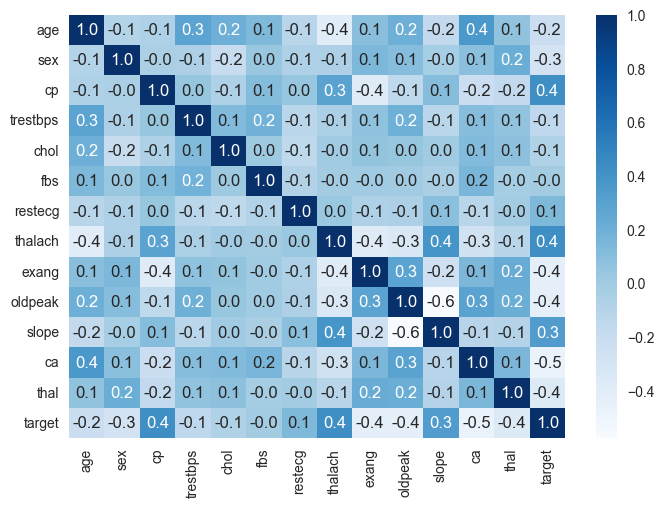

In [9]:
sns.heatmap(df.corr(method = 'pearson'), annot=True, fmt=".1f",cmap = 'Blues')

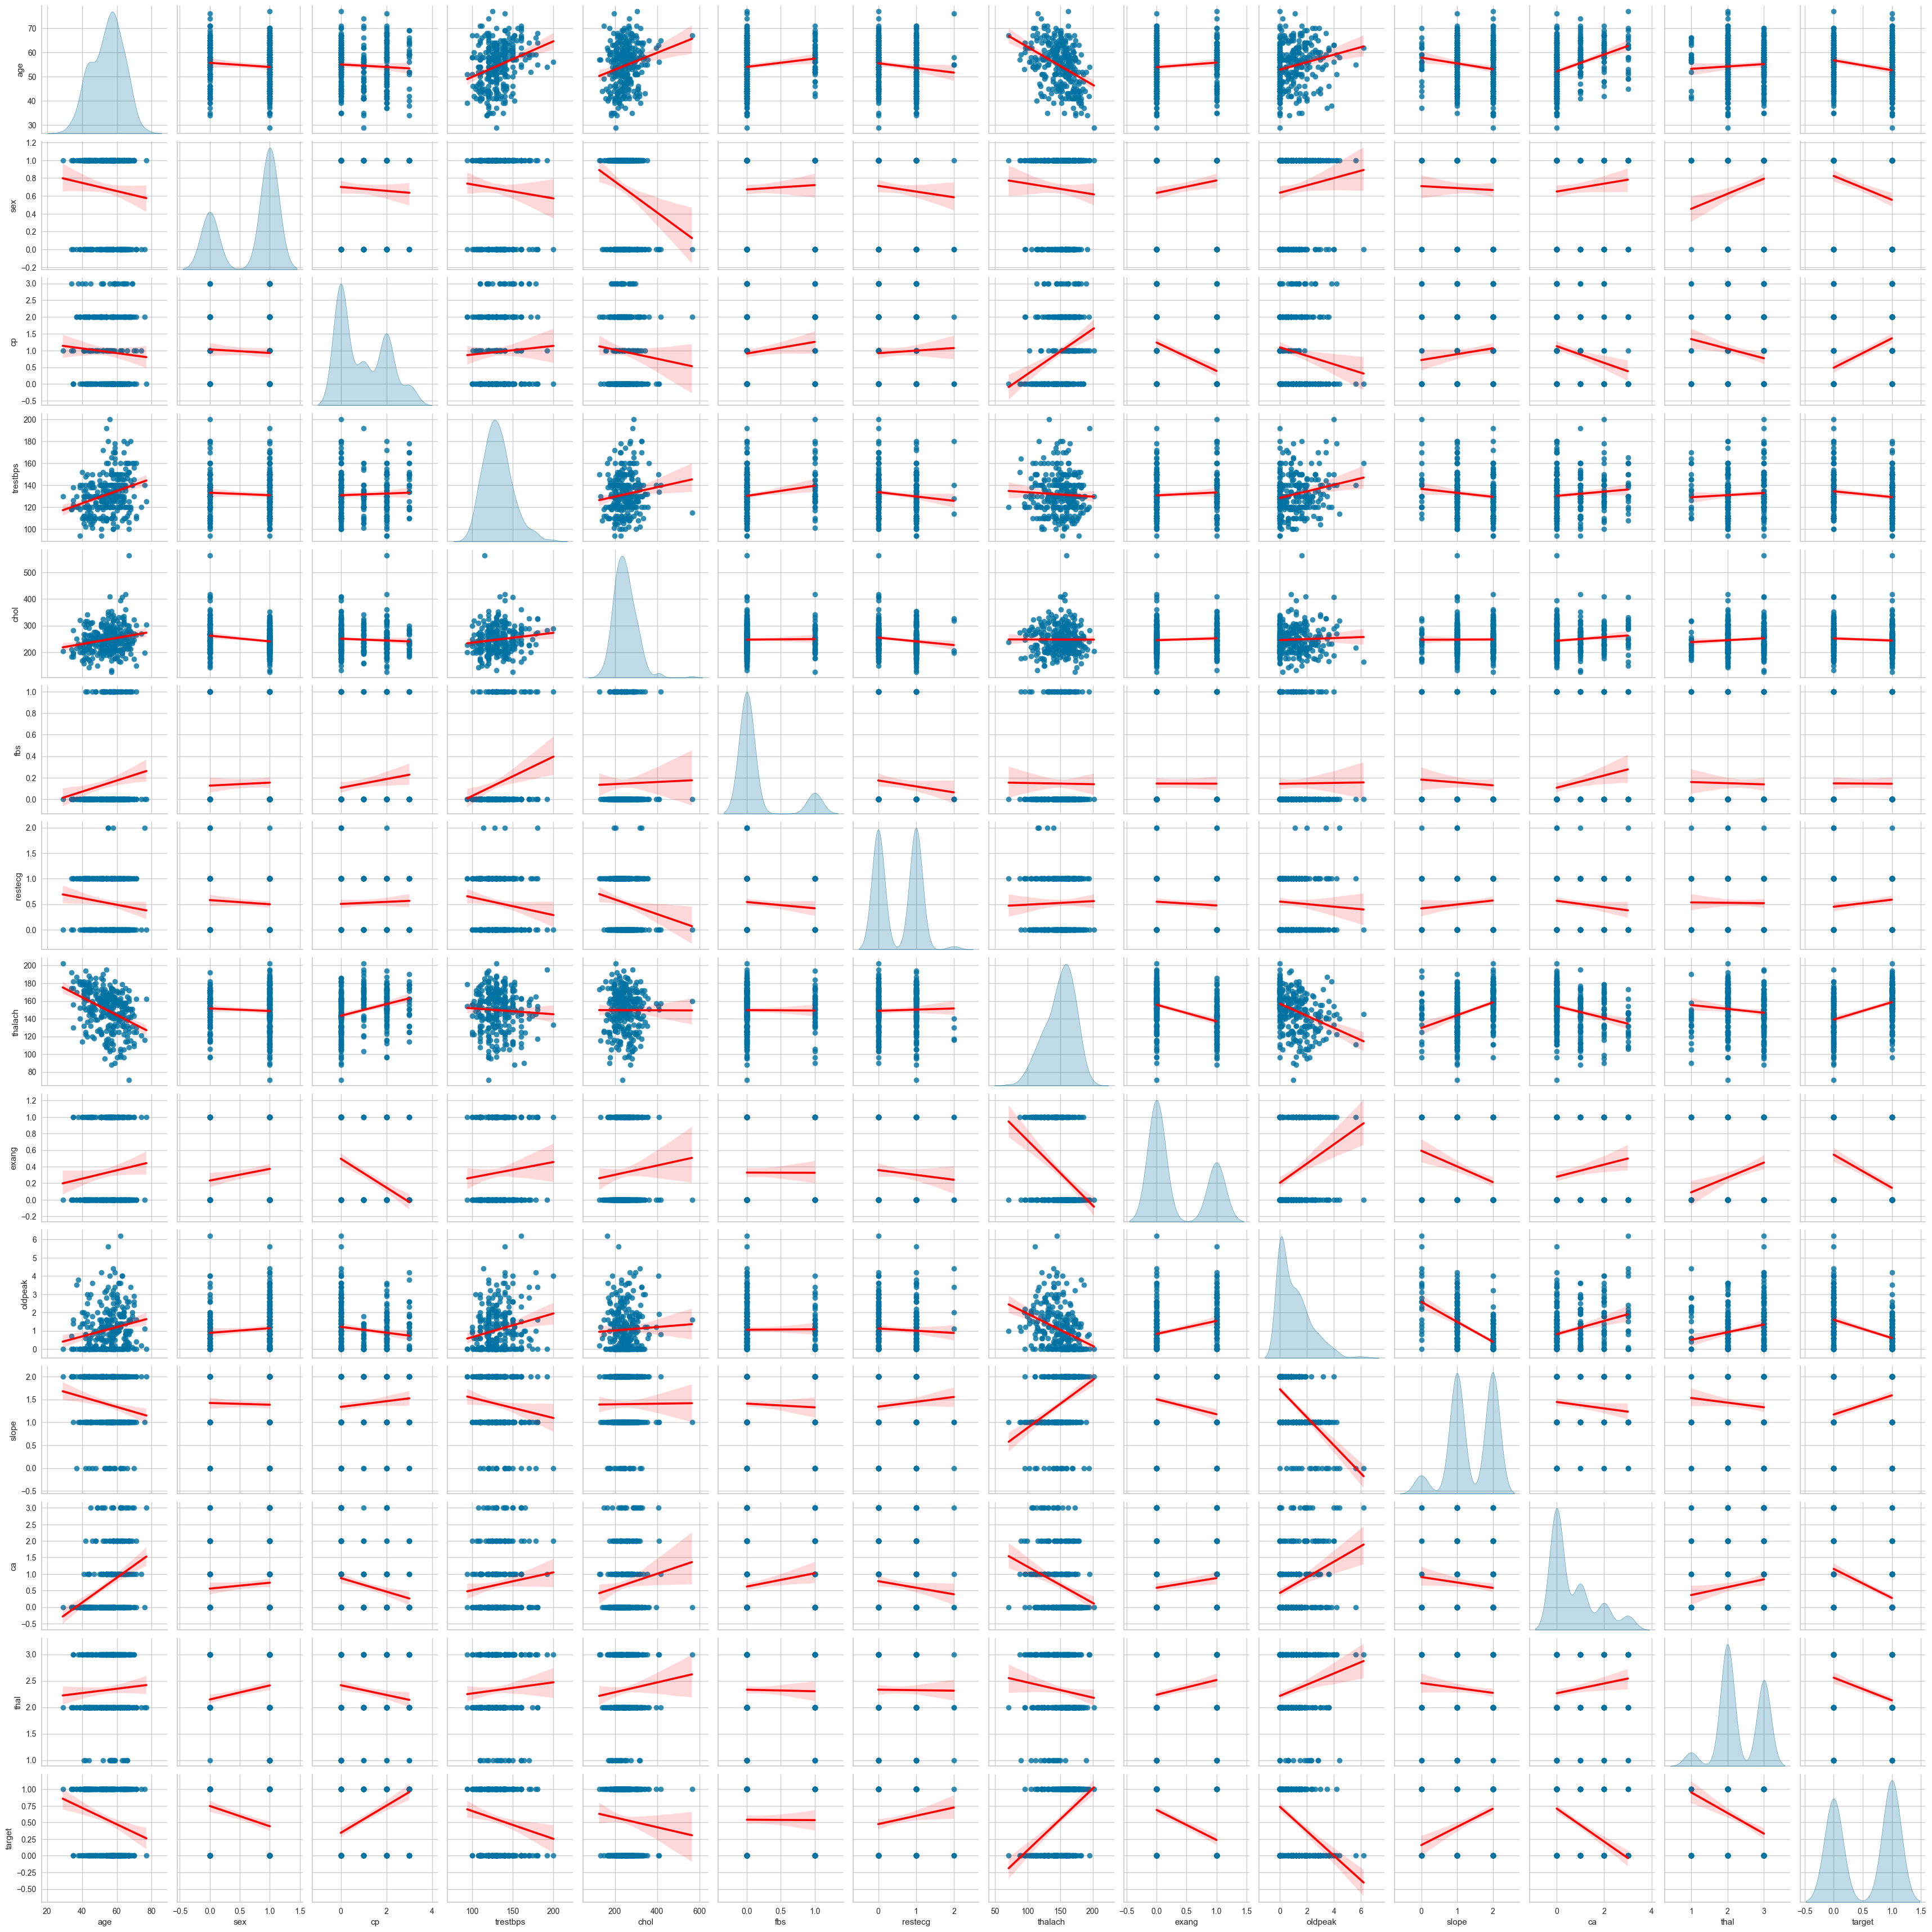

In [10]:
sns.pairplot(df,
             kind="reg",
             diag_kind="kde", 
             plot_kws={"line_kws": {"color": "red"}}
            )

# Separación de los Datos

In [11]:
x = df[["cp","thalach","ca", "oldpeak","thal","chol","trestbps","age"]]
y = df["target"]

## División de los datos en conjuntos de entrenamiento, testeo y validación. Ademas empleación de los modelos de clasificación

In [12]:
# seed sera nuestro valor para nuestro random state
seed = 0

# División de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
x_train, x_val,y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=seed)

# Clasificadores
# Diccionario
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Random Forest'
]

# Modelos de Clasificación
classifierss = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(5), # El 5 es el numero de vecinos cercanos que queremos que halle
    RandomForestClassifier(random_state=seed),
]

In [19]:
x_train.shape

(188, 8)

### Escalamiento de los datos

In [16]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

# Entrenando el escalador
scaler.fit(x_train)

# Usando el escalador entrenado para transformar los datos
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

In [18]:
x_train_scaled.shape

(188, 8)

# Probando los Modelos

Haciento uso de las funciones del inicio, vamos a poder el desempeño para los datos de entrenamiento - testeo y validación, tambien las matrices de confusión y las curvas ROC esto para cada uno de los tres modelos.

### Entrenamiento - Testeo

In [13]:
socre_train = score_summary_test(names, classifierss)
socre_train

,Clasificador,Accuracy,ROC_AUC,Recall,Precision,F1
0,Logistic Regression,85.00,0.92,0.93,0.79,0.85
1,Nearest Neighbors,80.00,0.84,0.86,0.75,0.80
2,Random Forest,83.33,0.92,0.89,0.78,0.83


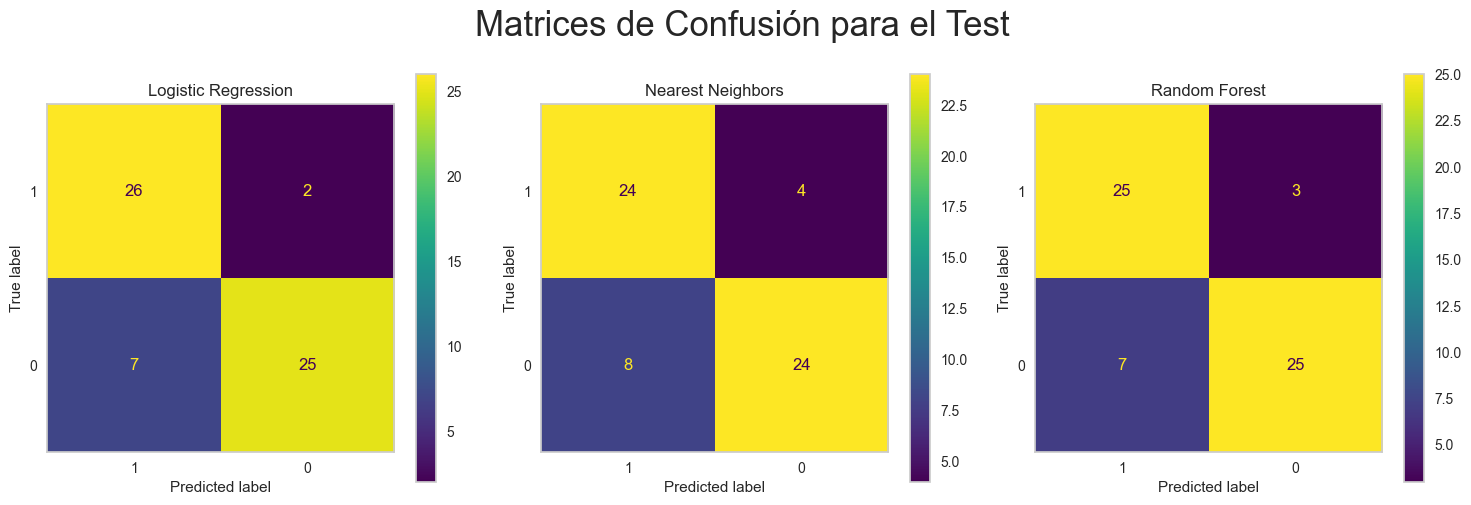

In [25]:
plot_conf_matrix_test(x_train_scaled, y_train, x_test_scaled, y_test,names, classifierss, 1, 3, 15, 5)

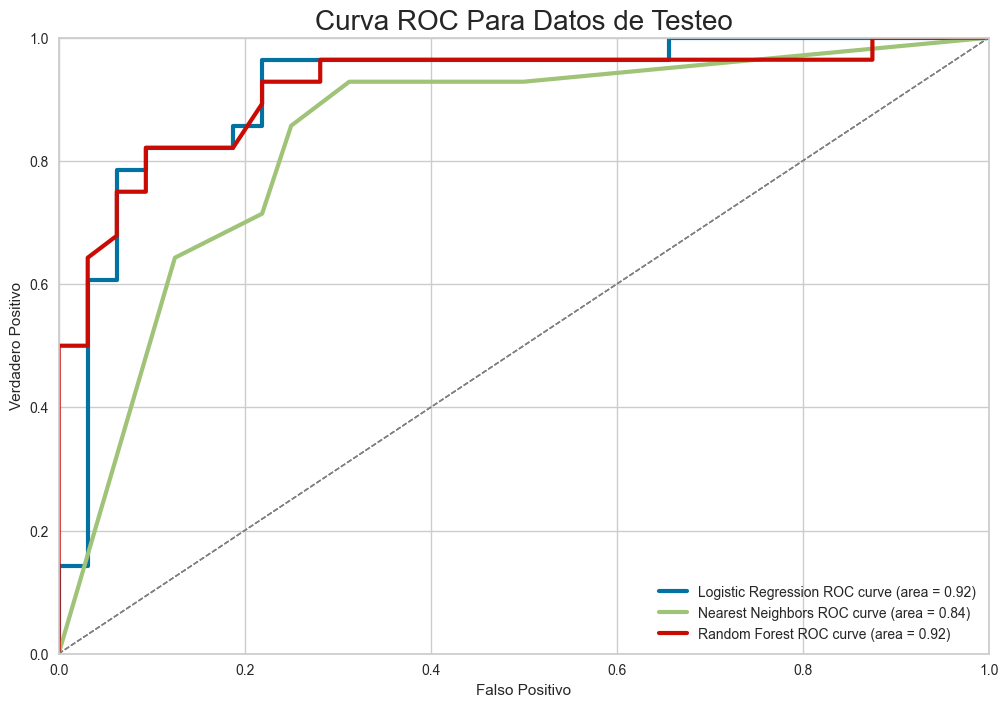

In [15]:
roc_auc_curve_test(names, classifierss)

## Para la Valdiación

In [16]:
socre_val = score_summary_val(names, classifierss)
socre_val

,Clasificador,Accuracy,ROC_AUC,Recall,Precision,F1
0,Logistic Regression,81.25,0.80,0.96,0.74,0.84
1,Nearest Neighbors,79.17,0.82,0.92,0.73,0.81
2,Random Forest,75.00,0.85,0.92,0.69,0.79


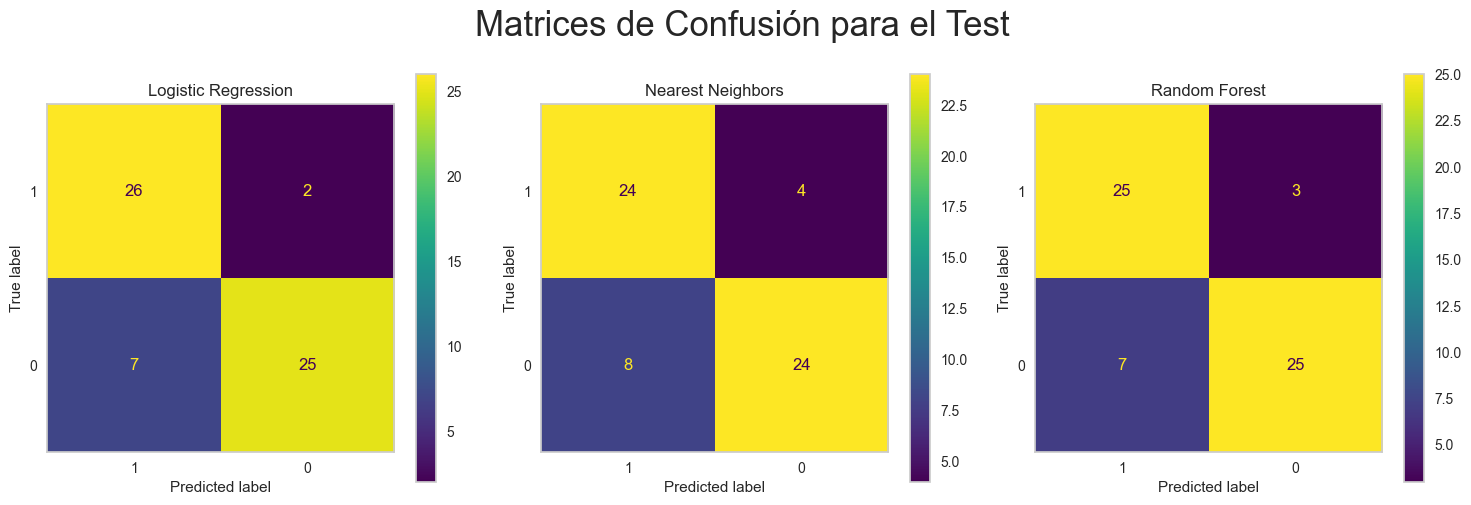

In [17]:
plot_conf_matrix_val(names, classifierss, 1, 3, 15, 5)

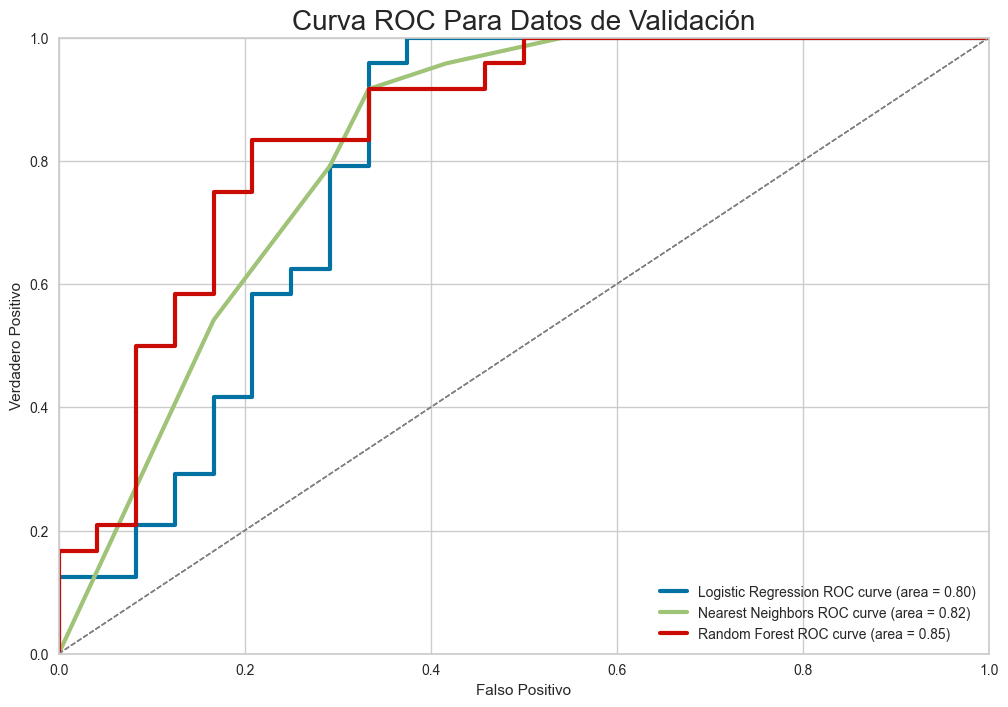

In [18]:
roc_auc_curve_val(names, classifierss)

## Optimizaciones

In [19]:
# Optimización

logistic_regresion = LogisticRegression(solver="liblinear", random_state=seed)

paramsrl = {
    'classifier__C': uniform(0.1, 10),
    'classifier__solver': ['liblinear', 'saga']
}

pipeline = Pipeline([
    
    ('scale', StandardScaler()),
    ('classifier', logistic_regresion)
])

rgs = RandomizedSearchCV(pipeline, param_distributions = paramsrl, n_iter = 10,
                         cv=7, scoring= 'accuracy', random_state=seed)
rgs.fit(x_train_scaled, y_train)
print(f"Mejores parámetros para la regrsion logistica (CV score=%0.3f):" % rgs.best_score_)
print(rgs.best_params_)

best_model_rgs = rgs.best_estimator_
best_model_rgs

Mejores parámetros para la regrsion logistica (CV score=0.856):
{'classifier__C': 0.6671297731744318, 'classifier__solver': 'liblinear'}


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.6671297731744318, random_state=0,
                                    solver='liblinear'))])

In [20]:
knn = KNeighborsClassifier(5)

# Definir los parámetros para la regresión logística
paramsknn = {
    'classifier__n_neighbors': randint(1, 20),
    'classifier__weights': ['uniform', 'distance']
}

# Crear el pipeline
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', knn)
])

# RandomizedSearchCV
kgs = RandomizedSearchCV(pipeline, param_distributions=paramsknn, n_iter=10, 
                         cv=7, scoring='accuracy', random_state=seed)

kgs.fit(x_train_scaled, y_train)

print(f"Mejores parámetros para la regresión logística (CV score=%0.3f):" % kgs.best_score_)
print(kgs.best_params_)

best_model_knn = kgs.best_estimator_
best_model_knn


Mejores parámetros para la regresión logística (CV score=0.830):
{'classifier__n_neighbors': 13, 'classifier__weights': 'distance'}


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=13, weights='distance'))])

In [21]:
# Definir el clasificador
random_forest = RandomForestClassifier(random_state=seed)

# Definir los parámetros para el Random Forest
params_rf = {
    'classifier__n_estimators': randint(100, 200),
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 10)
}

# Crear el pipeline
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', random_forest)
])

# RandomizedSearchCV
rfgs = RandomizedSearchCV(pipeline, param_distributions=params_rf, n_iter=10, 
                          cv=7, scoring='accuracy', random_state=seed)

rfgs.fit(x_train_scaled, y_train)

print(f"Mejores parámetros para Random Forest (CV score=%0.3f):" % rfgs.best_score_)
print(rfgs.best_params_)

best_model_rf = rfgs.best_estimator_
best_model_rf


Mejores parámetros para Random Forest (CV score=0.829):
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 7, 'classifier__n_estimators': 179}


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=4, min_samples_split=7,
                                        n_estimators=179, random_state=0))])

In [22]:
# Definir los clasificadores optimizados

names = ['Logistic Regression', 'Nearest Neighbors', 'Random Forest']
classifiers_optim = [
    rgs.best_estimator_,
    kgs.best_estimator_,
    rfgs.best_estimator_
]

# Re Evaluamos los Modelos

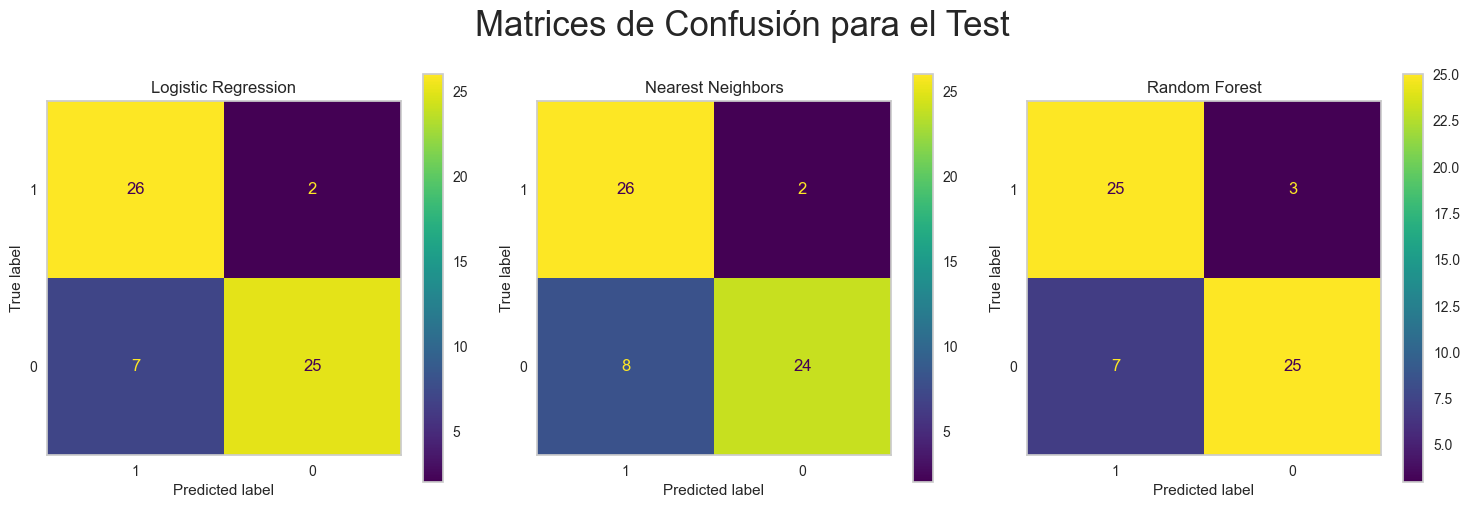

In [23]:
plot_conf_matrix_test(names, classifiers_optim, 1, 3, 15, 5)

In [24]:
socre_train_opt = score_summary_test(names, classifiers_optim)
socre_train_opt

,Clasificador,Accuracy,ROC_AUC,Recall,Precision,F1
0,Logistic Regression,85.00,0.93,0.93,0.79,0.85
1,Nearest Neighbors,83.33,0.89,0.93,0.76,0.84
2,Random Forest,83.33,0.92,0.89,0.78,0.83


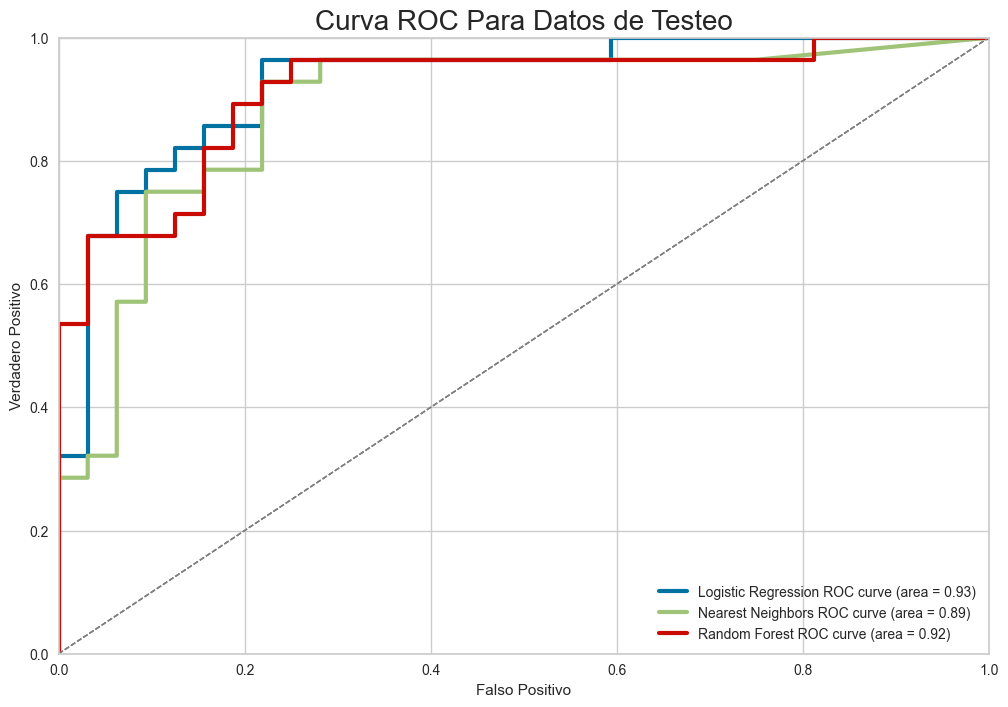

In [25]:
roc_auc_curve_test(names, classifiers_optim)

## Validacion

In [26]:
socre_val_opt = score_summary_val(names, classifiers_optim)
socre_val_opt

,Clasificador,Accuracy,ROC_AUC,Recall,Precision,F1
0,Logistic Regression,81.25,0.82,0.96,0.74,0.84
1,Nearest Neighbors,79.17,0.87,0.96,0.72,0.82
2,Random Forest,79.17,0.86,0.96,0.72,0.82


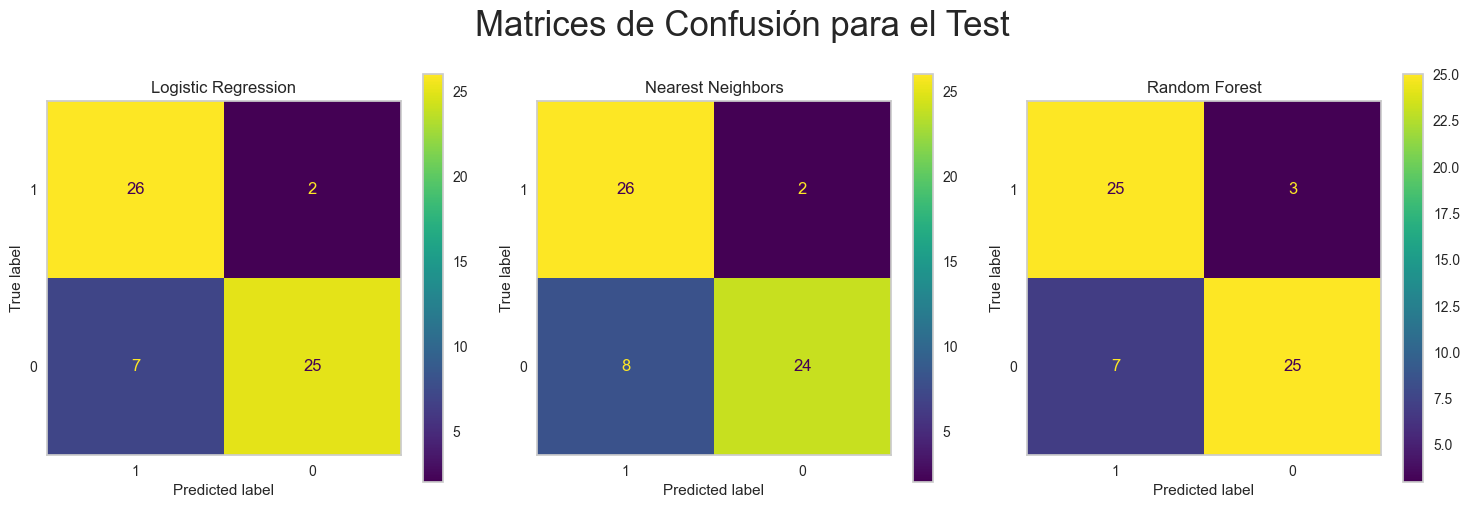

In [27]:
plot_conf_matrix_val(names, classifiers_optim, 1, 3, 15, 5)

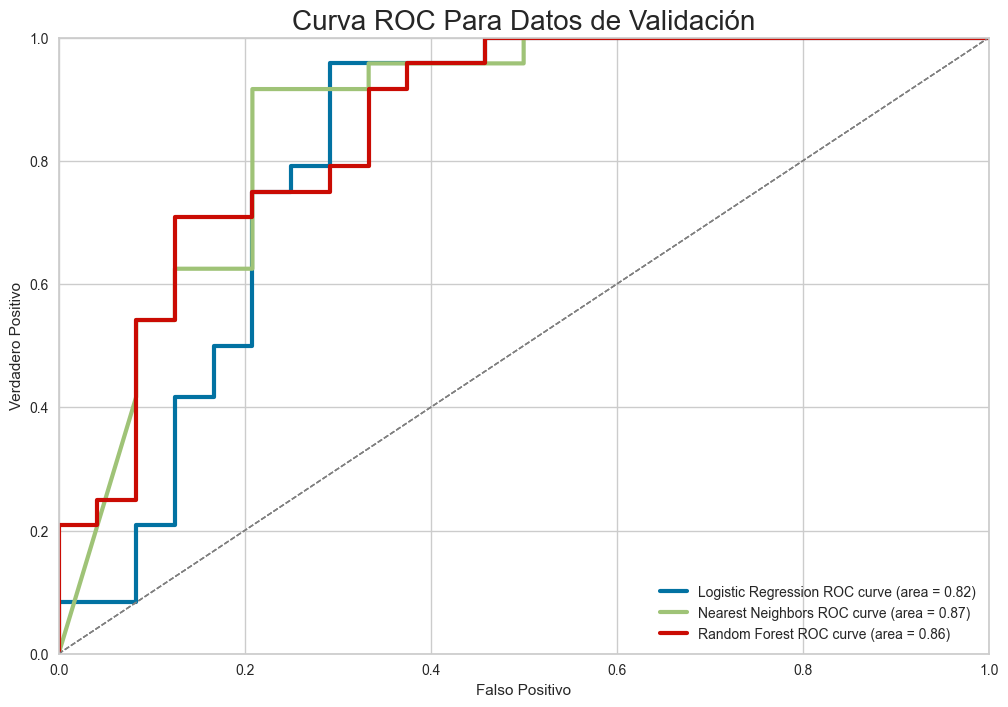

In [28]:
roc_auc_curve_val(names, classifiers_optim)

# ANALISIS Y CONCLUSIÓN

En principio el data set es algo pequeño ya que tenemos 296 y se hizo una division en tres grupos(entrenamiento, testeo y validación), lo que reduce sustancialmente el buen entrenamiento de los algoritmos de clasifcicación, por otro lado se hace una busqueda de las caracteristicas que tienen mejor correlación esto con el mapa de correlaciones, al final se escogen un total de ocho(9) caracteristicas para luego hacer la separación de 'x' y 'y' tomando como salida la variable target la cual puede ser 0 (No enfermo) ó 1(Enfermo)

Para los algoritmos usamos los vistos y sugeridos en clase, los cuales son la regresion logistica, knn y bosques aleatorios, se define una semilla para todos que sera de un valor de cero. se hace un tratamiento de escalado de datos para lograr una normalización de los mismos

Al momento de probar los modelos lo hacemos para datos entre los datos de entrenamiento y testeo y luego entre datos de entrenamiento y validación

Por ultimo se hace un proceso de optimización para los tres (3) modelos y se hace una nueva evaluacion de los modelos

### Para el Train - Test

Entre los 3 modelos no hay un gran acierto sin embargo no es malo y entre los 3 modelos sus valores no discrepan demasio y observando sus matrices y el grafico de las curvas ROC vemos los mejores son los bosques aleatorios y la regresión logistica con un ROC curve de 0.9 cuando el mejor valor es de 1.

Despues de hacer la optimización hiperparametrica vemos una mejoria no exponencial, ni gigante pero es una mejora en metricas como ROC_AUC indicando que tiene una mejor capacidad discriminatoria, tambien en la precision (AUC), recalco que no es sustancial la mejora pero si existe.

## Para el Train - Val

Para este caso que es el que mas nos deberia de importar vemos en sus indicadores de desempeño valores inesperados ya que la validación siempre deberia de comportarse peor que los valores de train-test vemos que la manera en que se desempeñan no son muy disferentes a los resultados de train- test pero si siguen siendo un desempeño muy regular en donde modelo el de clasificación que mejor resalta es el de knn con un accuracy de 81.25, sin embargo tenemos en los parametros como el F1 que nos indica un buen balance entre precisión y recall es menor que el de train - test asi mismo su ROC_AUC es menor que al train - test indicando que tiene peor capacidad dicriminatoria.

Despues de la optimización hiperparametrica vemos que los resultados de las distintas metricas de desempeño no muestran una mejoria de manera general, en algunos parametros hay variaciones positivas en otros negativas pero no son variaciones abruptas asi que tienen desempeños muy parecidos.

Por ultimo la ultilización de la optimización de hiperparametros no genero ningun impacto que sobresaliera en ninguno de los tres modelos de clasificación.

Se destaca que los modelos knn y regresion logistica como los mas exactos siendo knn antes hacer la optimización, esto para el desempeño del modelo con datos de validación que es donde mas nos importa ver el desempeño.

Como ultimo, se hace una aclaración de que se deja el seed = 0 ya que dandole valores distintos de 0 el modelo y sus curvas dan resultados terribles, la siguiente imagen es un ejemplo:

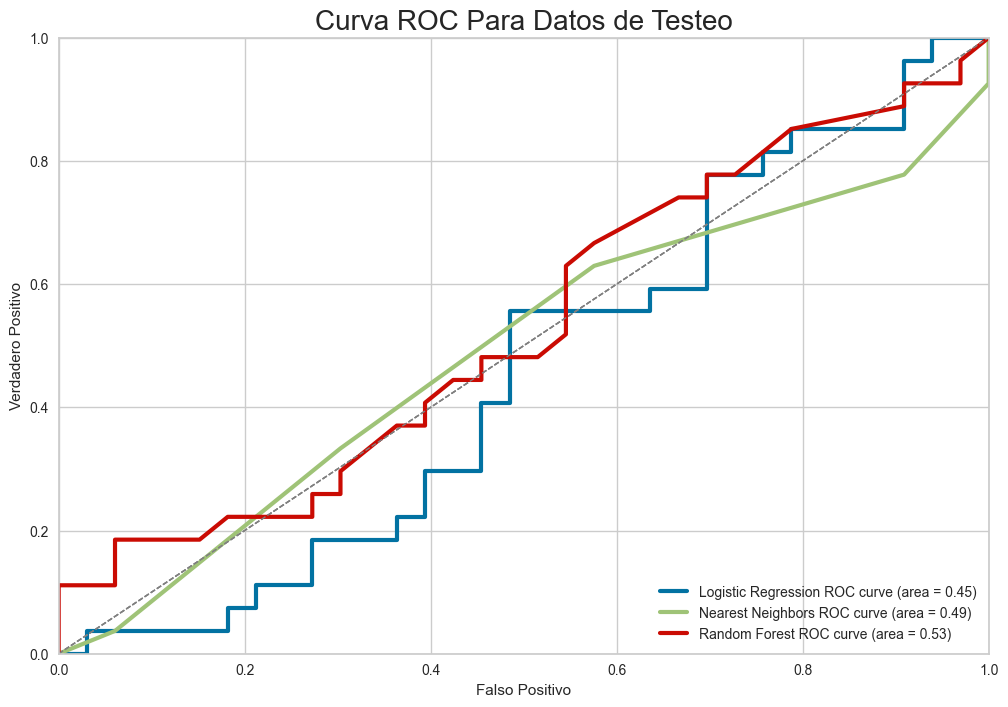

# Referencias

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?select=heart.csv

https://www.kaggle.com/code/desalegngeb/heart-disease-predictions